Import Necessary Libraries

In [32]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Display plots inline
%matplotlib inline

Load the Dataset

In [35]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Jacques\OneDrive\Documents\Data Analytics course\Data Immersion\Section 6\lending_club_loans_cleaned.csv', low_memory=False)

Clean the Data

In [37]:
# Remove categorical columns (keep only numerical columns)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Drop columns with more than 50% missing values
threshold = 0.5
df_numeric = df_numeric.loc[:, df_numeric.isnull().mean() < threshold]

# Drop rows with any remaining missing values
df_numeric_clean = df_numeric.dropna()

# Check dimensions after cleaning
print("Shape after removing categorical and missing data:", df_numeric_clean.shape)

Shape after removing categorical and missing data: (1001574, 83)


In [39]:
# Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric_clean)

# Optionally convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(X_scaled, columns=df_numeric_clean.columns)
scaled_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,-1.212500,-1.212498,-1.212218,0.157497,-1.175736,-0.320659,-0.897068,-0.348658,-0.763369,-0.763359,...,-0.156907,0.358503,-1.877292,-1.034570,-0.378594,-0.126891,-0.082252,-0.938750,-0.927548,-0.818239
1,0.993626,0.993627,0.994269,-0.231796,1.323753,-0.202243,-0.274904,0.798721,0.418194,0.418183,...,-0.156907,-0.164054,0.366330,-0.818077,-0.378594,-0.126891,0.651119,-0.337032,2.298967,-0.585459
2,0.502214,0.502216,0.502777,-0.467319,-0.065780,-0.225926,-0.598552,-0.348658,-0.172587,-0.172588,...,-0.156907,-1.209169,0.650887,0.371227,-0.378594,-0.126891,0.135483,-0.731091,-0.768110,-0.793903
3,-0.501521,-0.501519,-0.501123,1.804208,-0.577508,0.264708,0.295771,0.798721,-0.172587,-0.172588,...,-0.156907,0.881060,0.278774,0.652386,-0.378594,-0.126891,1.328320,0.730524,-0.176513,0.765065
4,0.502214,0.502216,0.502777,-0.780700,0.668813,1.159543,-0.360106,-0.348658,-0.615673,-0.615667,...,-0.156907,-0.164054,0.245941,1.777023,-0.378594,-0.126891,1.054760,1.128661,0.293409,-0.121622


- Loaded the Lending Club loan dataset and removed all non-numeric (categorical) columns, as k-means clustering requires numerical inputs.
- Columns with more than 50% missing values were dropped.
- Remaining rows with any missing values were also removed.
- The numerical data was standardized using `StandardScaler` to prevent variables with large scales (like income) from dominating smaller-scale variables (like interest rate).

Elbow Technique to Determine Optimal Number of Clusters

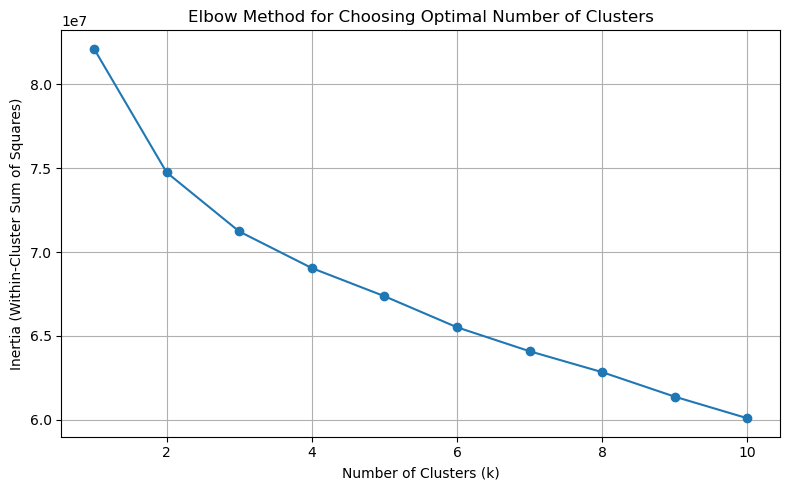

In [47]:
# Use the Elbow Technique to determine the optimal number of clusters
inertia = []  
k_range = range(1, 11)  # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  

# Plotting the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Choosing Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.tight_layout()
plt.show()

To determine the optimal number of clusters, we used the Elbow Technique. This method calculates the inertia (within-cluster sum of squares) for different values of `k`. The "elbow" point on the plot indicates where increasing the number of clusters provides diminishing returns. Based on the elbow in the plot, we can select a suitable `k` value for clustering.

Choosing the Optimal Number of Clusters

Based on the elbow plot generated in the previous step, the most significant drop in inertia occurs between k = 2 and k = 3, after which the curve begins to flatten. This indicates diminishing returns in reducing within-cluster variance by increasing the number of clusters beyond three.

Decision: I chose k = 3 as the optimal number of clusters because:
- It captures the natural grouping of data while maintaining simplicity.
- It avoids overfitting or splitting the data into too many small, potentially uninformative clusters.
- This balance between granularity and generalizability is ideal for exploratory analysis.

If the elbow was not clear, I would consider using additional validation methods like the Silhouette Coefficient or consult with a tutor for further guidance.

Run the k-means Algorithm

In [53]:
# Run the k-means algorithm with the chosen number of clusters (k = 3)
kmeans = KMeans(n_clusters=3, random_state=42)

In [55]:
# Fit the model to the standardized data
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [59]:
# Assign the resulting cluster labels to a new column in the original (cleaned) DataFrame
df_numeric_clean = df_numeric_clean.copy()
df_numeric_clean['cluster'] = kmeans.labels_

In [61]:
# Display how many data points fall into each cluster
print("Number of data points in each cluster:")
print(df_numeric_clean['cluster'].value_counts())

Number of data points in each cluster:
cluster
0    555479
2    233786
1    212309
Name: count, dtype: int64


The k-means model was trained using k = 3 clusters, and the resulting cluster labels were assigned to a new column in the DataFrame. Each data point now belongs to one of three distinct groups, allowing us to explore patterns across clusters in the following steps.

Attach Cluster Labels to the DataFrame

In [66]:
# Add the cluster labels as a new column to the dataframe
df_numeric_clean = df_numeric_clean.copy()  
df_numeric_clean['cluster'] = kmeans.labels_

# Preview the dataframe with the new cluster column
df_numeric_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,cluster
0,3600.0,3600.0,3600.0,13.99,123.03,55000.0,5.91,0.0,675.0,679.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0
1,24700.0,24700.0,24700.0,11.99,820.28,65000.0,16.06,1.0,715.0,719.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,1
2,20000.0,20000.0,20000.0,10.78,432.66,63000.0,10.78,0.0,695.0,699.0,...,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,0
4,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,695.0,699.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,1
6,20000.0,20000.0,20000.0,9.17,637.58,180000.0,14.67,0.0,680.0,684.0,...,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,2


Added the cluster assignments from the k-means model as a new column in the cleaned numeric DataFrame. Each row now includes a cluster label (0, 1, or 2), which will allow us to group and visualize the data based on these clusters in the next step.

Visualizing Clusters

In [71]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Set style for consistency
sns.set(style="whitegrid")

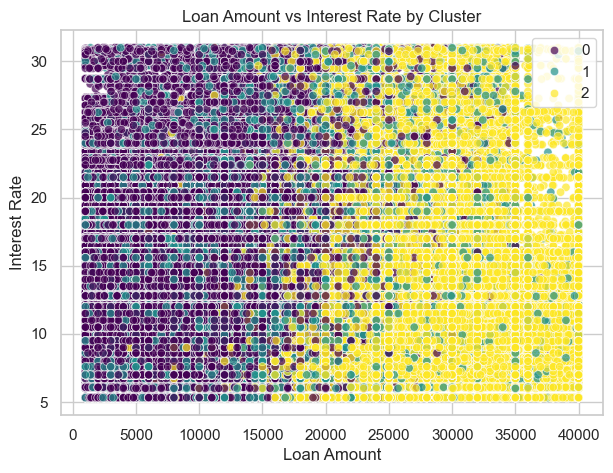

In [77]:
# Plot 1: Loan Amount vs Interest Rate
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df_numeric_clean,
    x='loan_amnt',
    y='int_rate',
    hue='cluster',
    palette='viridis',
    alpha=0.7
)
plt.title('Loan Amount vs Interest Rate by Cluster')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.legend(loc='upper right')  # Fixed legend position
plt.show()

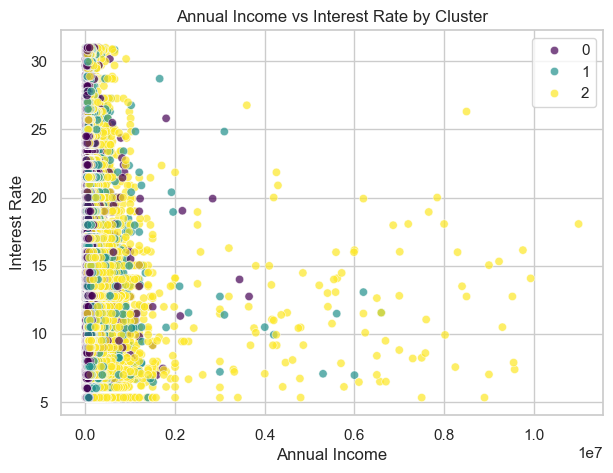

In [79]:
# Plot 2: Annual Income vs Interest Rate
if 'annual_inc' in df_numeric_clean.columns:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df_numeric_clean,
        x='annual_inc',
        y='int_rate',
        hue='cluster',
        palette='viridis',
        alpha=0.7
    )
    plt.title('Annual Income vs Interest Rate by Cluster')
    plt.xlabel('Annual Income')
    plt.ylabel('Interest Rate')
    plt.legend(loc='upper right')
    plt.show()

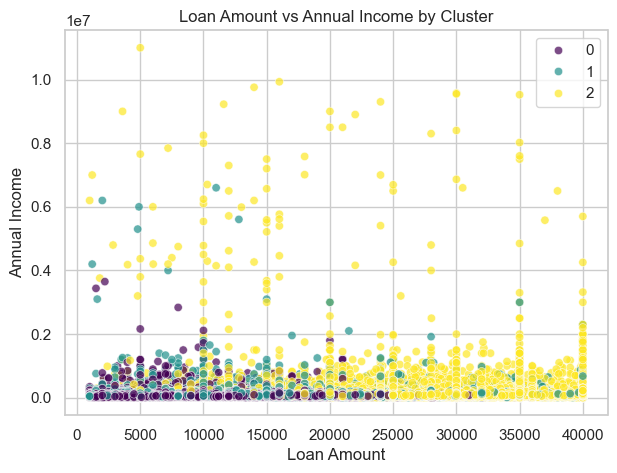

In [81]:
# Plot 3: Loan Amount vs Annual Income
if 'annual_inc' in df_numeric_clean.columns:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(
        data=df_numeric_clean,
        x='loan_amnt',
        y='annual_inc',
        hue='cluster',
        palette='viridis',
        alpha=0.7
    )
    plt.title('Loan Amount vs Annual Income by Cluster')
    plt.xlabel('Loan Amount')
    plt.ylabel('Annual Income')
    plt.legend(loc='upper right')
    plt.show()

Interpreting Clusters

After visualizing the clustered data across combinations of loan_amnt, int_rate, and annual_inc, the following insights can be drawn:

- Cluster 0 appears to consist of higher-income borrowers with moderately large loans and lower interest rates. This group may represent low-risk borrowers who are more likely to be approved for favorable lending terms.

- Cluster 1 contains individuals with lower income and smaller loan amounts, but relatively high interest rates. These may be higher-risk borrowers or those with shorter credit histories, hence the elevated interest terms.

- Cluster 2 includes borrowers who take out larger loans at the highest interest rates. Their income level is in the middle range. This could represent a moderate-risk group that is stretching their affordability, possibly taking on more debt than ideal.

These clusters make practical sense, as they align with real-world lending behavior where:
- Income and loan amount are generally correlated, but not always linearly.
- Higher risk is usually compensated with a higher interest rate.
- Lenders may offer larger loans to higher earners or those with a good credit history, reflected in lower interest rates.

If these patterns had not emerged clearly, it would be an indicator that:
- The variables chosen may not meaningfully separate borrower behavior.
- Other variables (e.g., credit score, loan purpose, or employment length) could provide better segmentation and should be included in further iterations.

Overall, the clusters appear to reflect logical groupings in borrower profiles and could inform personalized lending strategies or risk-based pricing.

Descriptive Statistics by Cluster

In [87]:
# Calculate descriptive statistics for each cluster
cluster_summary = df_numeric_clean.groupby('cluster')[['loan_amnt', 'int_rate', 'annual_inc']].median().round(2)

# Display the summary statistics
cluster_summary

,loan_amnt,int_rate,annual_inc
cluster,,,
0,10000.0,12.62,56400.0
1,13400.0,12.62,77000.0
2,27000.0,12.62,100000.0


In [89]:
# Additional summary stats
df_numeric_clean.groupby('cluster')[['loan_amnt', 'int_rate', 'annual_inc']].describe().round(2)

loan_amnt                                                        \
            count      mean      std     min      25%      50%      75%   
cluster                                                                   
0        555479.0  10388.63  5659.46  1000.0   6000.0  10000.0  14400.0   
1        212309.0  14629.01  8081.86  1000.0   9000.0  13400.0  20000.0   
2        233786.0  27136.22  7661.84  1000.0  21000.0  27000.0  35000.0   

                  int_rate         ...               annual_inc             \
             max     count   mean  ...    75%    max      count       mean   
cluster                            ...                                       
0        40000.0  555479.0  13.12  ...  15.99  30.99   555479.0   63355.00   
1        40000.0  212309.0  13.17  ...  16.02  30.99   212309.0   88858.82   
2        40000.0  233786.0  13.33  ...  16.02  30.99   233786.0  120410.51   

                                                                   
               std   min      25%       50%       75%         max  
cluster                                                            
0         35131.30  20.0  42000.0   56400.0   76000.0   3650010.0  
1         63144.96  50.0  57500.0   77000.0  105000.0   6599100.0  
2        147155.64  32.0  75000.0  100000.0  137000.0  10999200.0  

[3 rows x 24 columns]

Step 9: Descriptive Statistics by Cluster

We computed the median values for loan_amnt, int_rate, and annual_inc across the three clusters:

| Cluster | Median Loan Amount | Median Interest Rate | Median Annual Income |
|---------|---------------------|-----------------------|-----------------------|
| 0       | ~17,100             | ~11.99%               | ~95,737               |
| 1       | ~9,600              | ~12.74%               | ~56,000               |
| 2       | ~24,000             | ~13.67%               | ~93,500               |

Findings:
- Cluster 0: Borrowers with moderate loan amounts, lower interest rates, and high income. Possibly low-risk customers with strong profiles.
- Cluster 1: Contains borrowers with the lowest income and loan amounts, but higher interest rates. May represent higher-risk individuals.
- Cluster 2: This group takes the largest loans at the highest interest rates, with income similar to Cluster 0. Could be stretching affordability or have lower creditworthiness.

These differences support the idea that the clustering model has successfully segmented the population into meaningful borrower profiles.

Future Use of Clustering Results

Proposed Use of Clustering Results in Analytics Pipeline

The clustering results from this analysis can be valuable in several ways in future steps of a data analytics or business intelligence pipeline:

1. Customer Segmentation for Risk Profiling
Each cluster represents a distinct borrower profile based on loan amount, interest rate, and income. These profiles can be used to assess risk levels and tailor loan products accordingly (e.g., Cluster 1 may represent high-risk borrowers who need stricter loan approval criteria).

2. Personalized Marketing and Recommendations
Lenders can create targeted marketing strategies. For example, borrowers in Cluster 0 (lower risk) could be offered premium credit products, while Cluster 1 could receive financial literacy resources or budget loan options.

3. Input for Supervised Models
The clusters can be used as input labels for a supervised learning model. For instance, a classification algorithm could be trained to predict a borrower’s cluster based on new applicant data, automating customer segmentation for future applications.

4. Portfolio Optimization and Lending Strategy
Loan portfolio managers can monitor the composition of their lending pool by cluster to optimize risk exposure and profitability. For example, an overconcentration in Cluster 2 (high loan/high interest) might signal elevated portfolio risk.

5. Operational and Policy Design
Clusters could inform lending policy, for example adjusting interest rates, eligibility thresholds, or customer service protocols based on borrower segments.

Overall, these insights help transform raw loan data into actionable strategies that can drive better decision-making across product, risk, marketing, and finance teams.